In [1]:
import pandas as pd
import numpy as np
import matplotlib as matplot

path_hg = "/space/scratch/amorin/aggregate_microglia/microglia_gene_count_summary_hg.tsv"
path_mm = "/space/scratch/amorin/aggregate_microglia/microglia_gene_count_summary_mm.tsv"
pc_hg_path = "/home/amorin/Data/Metadata/refseq_select_hg38.tsv"
pc_mm_path = "/home/amorin/Data/Metadata/refseq_select_mm10.tsv"
pc_ortho_path = "/home/amorin/Data/Metadata/hg_mm_1to1_ortho_genes_DIOPT-v8.tsv"

df_hg = pd.read_csv(path_hg, sep = "\t")
df_mm = pd.read_csv(path_mm, sep = "\t")

pc_hg = pd.read_csv(pc_hg_path, sep = "\t")
pc_mm = pd.read_csv(pc_mm_path, sep = "\t")
pc_ortho = pd.read_csv(pc_ortho_path, sep = "\t")

In [2]:
print(df_hg.head())
print(df_mm.head())

   Symbol       Avg  Med        SD         CV      Avg_rank       RP  N_msr
0   OR4F5  0.000000  0.0  0.000000        NaN  14511.444444  18719.5      0
1  OR4F29  0.000000  0.0  0.000000        NaN  14511.444444  18719.5      0
2  OR4F16  0.000000  0.0  0.000000        NaN  14511.444444  18719.5      0
3  SAMD11  0.210281  0.0  0.831816  19.477430  11276.777778  11655.0      3
4   NOC2L  0.617246  0.0  2.052734   4.189272   5465.333333   5412.0     14
   Symbol       Avg  Med        SD         CV      Avg_rank       RP  N_msr
0    Xkr4  0.644948  0.0  1.010673  23.765463   9947.931818   7513.0     17
1     Rp1  0.017717  0.0  0.169761  55.016974  13411.931818  15021.0      4
2   Sox17  0.014261  0.0  0.247486  30.991440  12520.840909  13744.0      7
3  Mrpl15  1.175056  0.0  2.519399   3.050234   4140.204545   3686.0     39
4  Lypla1  0.824190  0.0  2.098785   4.952570   5788.886364   5207.0     33


In [3]:
# Min gene filter: require genes have minimal measurement, average, and var

def filter_by_quantile(df, qtl = 0.25):
    df = df[(df.Avg > df.Avg.quantile(qtl)) & 
            (df.SD > df.SD.quantile(qtl)) & 
            (df.N_msr > df.N_msr.quantile(qtl))
    ]
    return df


# Showing complex: unecessary as min msr covers case of 0 avg/sd
# filt_df_hg = df_hg[(df_hg.Avg > 0) & (df_hg.SD > 0) & (df_hg.N_msr > 5)]

# Using query
# filt_df_hg = df_hg.query("Avg > 0 and SD > 0 and N_msr > 3")

# Separated out
# avg_filter = df_hg[df_hg.Avg == 0]
# sd_filter = df_hg[df_hg.Avg == 0]
# msr_filter = df_hg[df_hg.N_msr < 3]


# Stepping from 0 to 1 in 0.1 increments while including both 0 and 1
# df_hg.Avg.quantile(np.linspace(0, 1, 11))
# df_hg.Avg.quantile(np.arange(0, 1.1, 0.1))

In [4]:
filt_df_hg = filter_by_quantile(df_hg)
filt_df_mm = filter_by_quantile(df_mm)

                Avg           Med            SD            CV      Avg_rank  \
count  13832.000000  13832.000000  13832.000000  13832.000000  13832.000000   
mean       0.822824      0.064377      1.777124      7.498131   7020.493762   
std        0.971497      0.659355      0.916245      5.843420   3274.852074   
min        0.029316      0.000000      0.307692      0.545209    122.166667   
25%        0.194690      0.000000      1.009801      3.390472   4372.083333   
50%        0.484524      0.000000      1.689505      5.380399   6972.444444   
75%        1.061940      0.000000      2.441539      9.968310   9822.902778   
max        9.147457     10.794115      4.502083     48.978862  13251.166667   

                 RP         N_msr  
count  13832.000000  13832.000000  
mean    6925.484673     11.519809  
std     4007.794940      4.030993  
min        1.000000      3.000000  
25%     3458.750000      9.000000  
50%     6916.500000     12.000000  
75%    10374.250000     15.000000  


<Axes: >

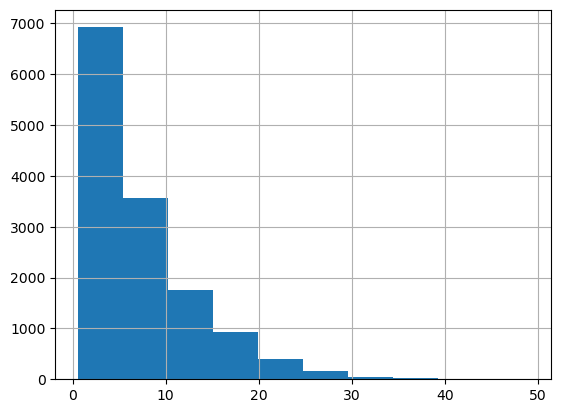

In [5]:
print(filt_df_hg.describe())
print(filt_df_mm.describe())
filt_df_hg.CV.hist()

In [6]:
# Most variable genes that are still "appreciably" expressed
# NOTE: CV looks wrong?

topvar_hg = filt_df_hg[filt_df_hg.Avg > 1].nlargest(1000, "CV")
topvar_mm = filt_df_mm[filt_df_mm.Avg > 1].nlargest(1000, "CV")

In [7]:
print(topvar_hg)
print(topvar_mm)

        Symbol       Avg  Med        SD         CV      Avg_rank      RP  \
14613    RCVRN  1.381452  0.0  1.480738  34.412143   9949.444444  5420.0   
3537     GNAT1  1.068848  0.0  1.312051  24.665757  10654.833333  6953.0   
7433   SLC26A3  1.187698  0.0  1.406995  19.709477   9725.444444  4251.0   
15471    PDE6G  1.587247  0.0  1.657047  18.085948   9051.833333  4564.0   
3132       SAG  1.610722  0.0  1.653839  18.082229   9171.888889  4632.0   
...        ...       ...  ...       ...        ...           ...     ...   
7373    TRIM56  1.041535  0.0  2.597435   3.071401   3639.444444  3212.0   
3614   SELENOK  2.244717  0.0  2.604510   3.071037   5334.611111  2106.0   
8022    CHCHD7  1.510163  0.0  2.789254   3.068509   3499.111111  2382.0   
15463  NDUFAF8  1.195121  0.0  2.304253   3.068468   5577.500000  3817.0   
9938     NUP98  1.212469  0.0  2.498153   3.068324   3971.000000  2953.0   

       N_msr  
14613      6  
3537       6  
7433       6  
15471      9  
3132      10

In [8]:
# Compare orthology by using case matching, comparing it to the actual 1:1

symbol_hg = pc_hg.Symbol
symbol_mm = pc_mm.Symbol

print(all(df_hg.Symbol.isin(symbol_hg)))
print(all(df_mm.Symbol.isin(symbol_mm)))

True
True


In [14]:
hg_not_ortho = symbol_hg[~symbol_hg.isin(pc_ortho.Symbol_hg)]
mm_not_ortho = symbol_mm[~symbol_mm.isin(pc_ortho.Symbol_mm)]
print(hg_not_ortho)
print(mm_not_ortho)

1         OR4F5
2        OR4F29
3        OR4F16
9          HES4
21       SCNN1D
          ...  
19209     BPY2B
19210      DAZ3
19211      DAZ4
19212     BPY2C
19213      CDY1
Name: Symbol, Length: 2514, dtype: object
21            Sgk3
69           Gsta3
70          Khdc1a
75       Ppp1r14bl
84         Gm20172
           ...    
20967      Gm20917
20968      Gm21242
20969      Gm21394
20970      Gm20854
20971      Gm21838
Name: Symbol, Length: 4253, dtype: object


In [13]:
ortho_not_hg = pc_ortho[~pc_ortho.Symbol_hg.isin(symbol_hg)]
ortho_not_mm = pc_ortho[~pc_ortho.Symbol_mm.isin(symbol_mm)]
print(ortho_not_hg)
print(ortho_not_mm)

      Symbol_hg      Symbol_mm                      ID
2669      MYLPF          Mylpf             MYLPF_Mylpf
6808    GPATCH4        Gpatch4         GPATCH4_Gpatch4
6896     EFCAB1         Efcab1           EFCAB1_Efcab1
8104   C9orf116  1700007K13Rik  C9orf116_1700007K13Rik
8264   C11orf53  1810046K07Rik  C11orf53_1810046K07Rik
8561     FAM71D         Fam71d           FAM71D_Fam71d
9822    FAM71E1        Fam71e1         FAM71E1_Fam71e1
13175     ZADH2          Zadh2             ZADH2_Zadh2
13391  C11orf49  1110051M20Rik  C11orf49_1110051M20Rik
13739   C7orf26  E130309D02Rik   C7orf26_E130309D02Rik
14564   FAM71E2        Fam71e2         FAM71E2_Fam71e2
14717   FAM71F2        Fam71f2         FAM71F2_Fam71f2
15732   FAM71F1        Fam71f1         FAM71F1_Fam71f1
15809   TMEM211        Tmem211         TMEM211_Tmem211
16211  C19orf71  4930404N11Rik  C19orf71_4930404N11Rik
16217    FAM71B         Fam71b           FAM71B_Fam71b
16384  C15orf65        Ccpg1os        C15orf65_Ccpg1os
16408    F

In [29]:
case_hg = symbol_hg.str.title().isin(symbol_mm)
case_in_hg = symbol_hg[case_hg]
case_out_hg = symbol_hg[~case_hg]

In [31]:
case_mm = symbol_mm.str.upper().isin(symbol_hg)
case_in_mm = symbol_mm[case_mm]
case_out_mm = symbol_mm[~case_mm]

In [ ]:
pc_ortho[pc_ortho.Symbol_hg.isin(case_out_hg)]

In [ ]:
pc_ortho[pc_ortho.Symbol_mm.isin(case_out_mm)]

In [ ]:
symbol_case = set(symbol_hg.str.title()).intersection(set(symbol_mm))
# case_not_ortho = 

In [64]:
# missing = set(pc_ortho.Symbol_mm).difference(set(symbol_case))
# TODO: pc ortho not in pc dfs
missing = pc_ortho[~pc_ortho.Symbol_mm.isin(symbol_case)]



In [ ]:
missing

In [ ]:
print("SLC33A1" in pc_hg.Symbol)
print("Slc33a1" in pc_mm.Symbol)

In [ ]:
df_hg.shape

In [ ]:
# Use of iloc/loc